**Project Title:** "Bollywood Beats: A Data-Driven Analysis of Hindi Film Music on Spotify"

Saving bollywood_spotify_dataset.csv to bollywood_spotify_dataset (1).csv

===== Dataset Head =====
     track_id     track_name          artist     genre  release_year  \
0  BOLLY_0001  Kal Ho Naa Ho              KK     Dance          2004   
1  BOLLY_0002   Sun Saathiya              KK  Romantic          2018   
2  BOLLY_0003         Raabta      Sonu Nigam   Classic          2018   
3  BOLLY_0004       Galliyan  Shreya Ghoshal       Pop          2000   
4  BOLLY_0005         Shayad     Neha Kakkar   Classic          2021   

   popularity  danceability  energy  valence   tempo  duration_ms  
0          92          0.48    0.78     0.03   98.36       284393  
1           9          0.19    0.27     0.17  178.61       231348  
2          75          0.17    0.18     0.18  118.24       263816  
3          93          0.62    0.69     0.39   74.69       273053  
4           0          0.52    0.62     0.40  147.02       216262  

===== Dataset Info =====
<class 'pandas.core.frame.DataFra

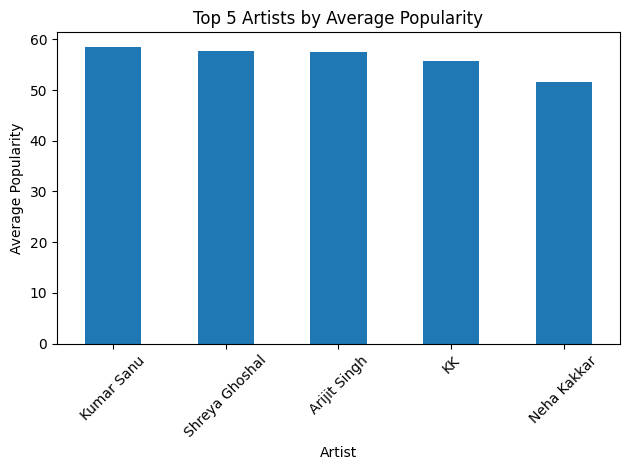


===== Genre Popularity Over Time =====


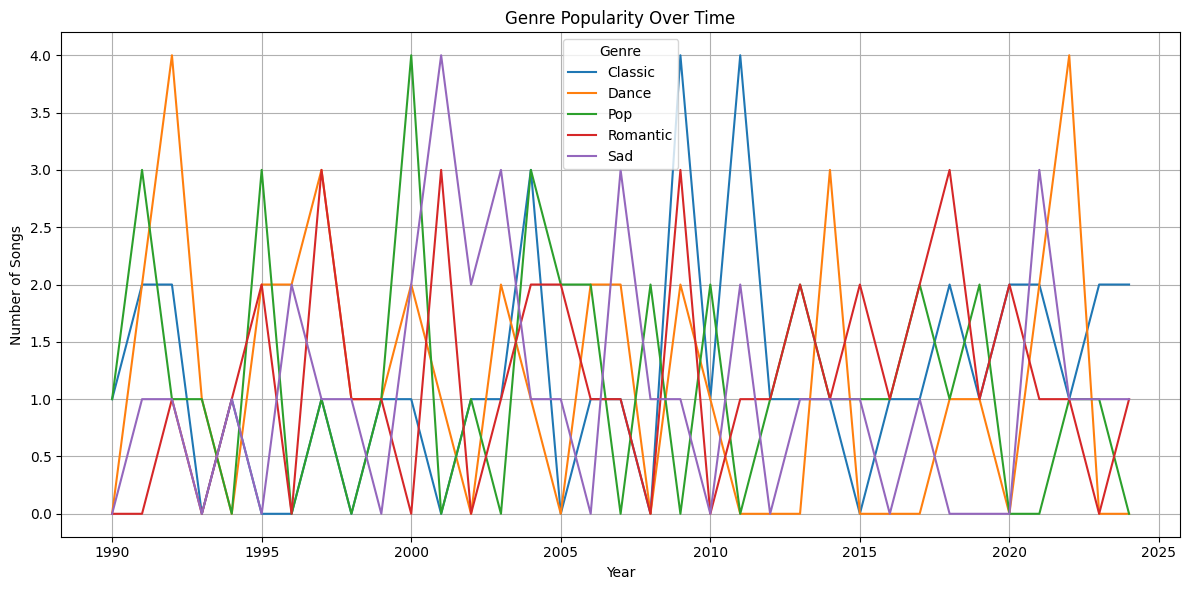


===== Popular vs Unpopular Songs (Danceability) =====


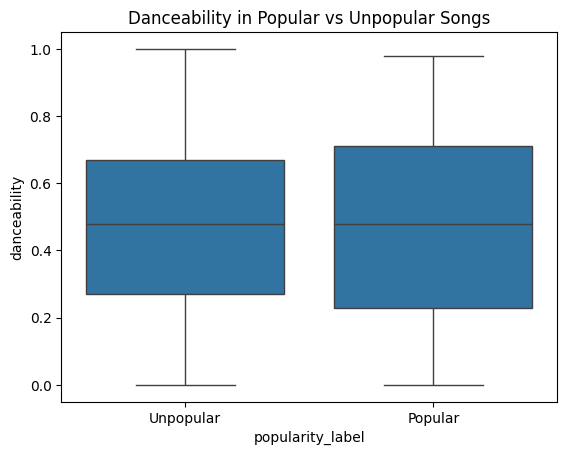


===== Correlation between Audio Features =====


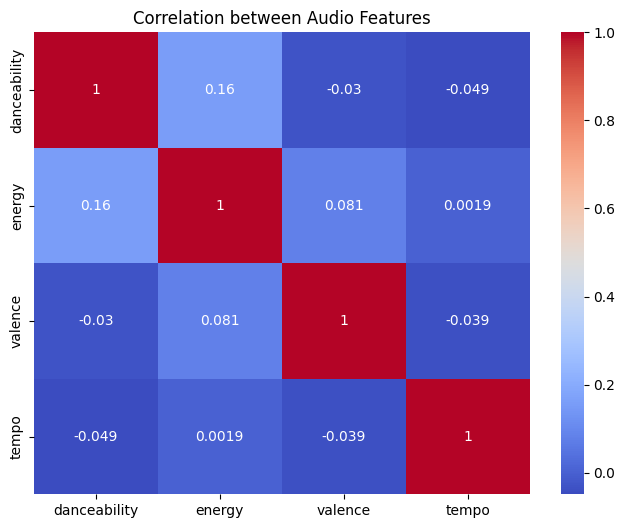


===== WordCloud of Song Titles =====


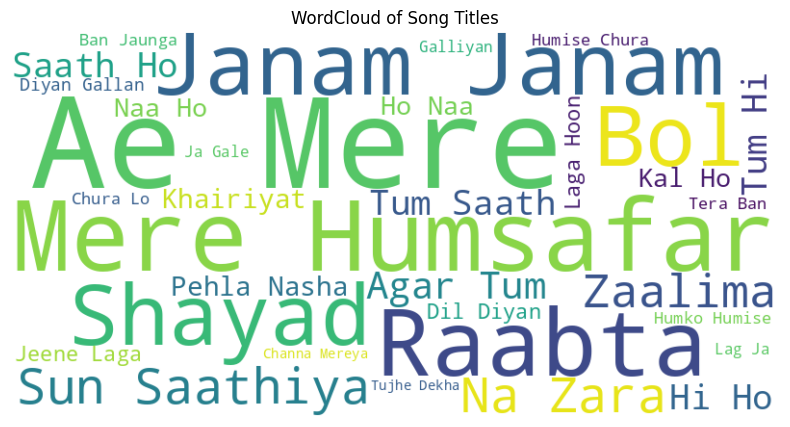


===== Radar Chart - Audio Profile Comparison =====


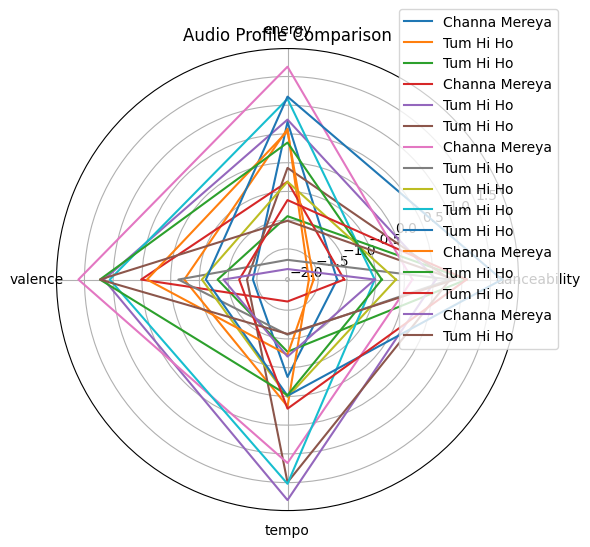


===== Song Recommendation =====

Recommended songs similar to 'Tum Hi Ho':
            track_name        artist     genre  popularity
93        Sun Saathiya    Kumar Sanu       Sad          45
166            Zaalima    Kumar Sanu     Dance          47
185           Galliyan    Sonu Nigam  Romantic          69
24   Agar Tum Saath Ho  Arijit Singh       Pop          78
156      Channa Mereya   Neha Kakkar  Romantic          71

===== Genre Distribution Pie Chart =====


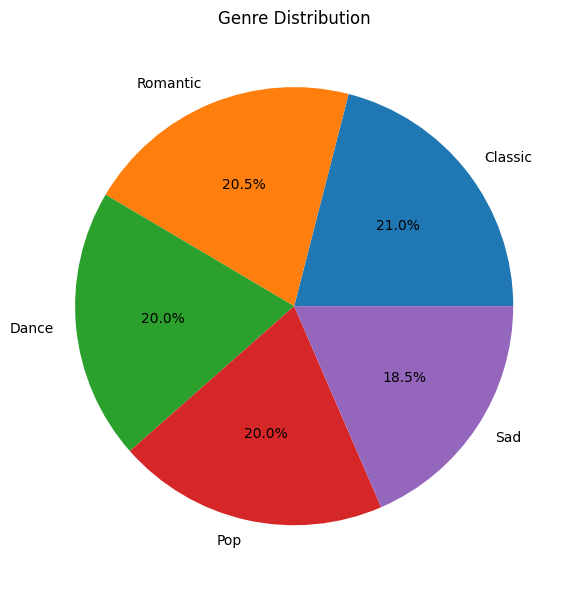

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from math import pi

# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# --- Overview ---
print("\n===== Dataset Head =====")
print(df.head())
print("\n===== Dataset Info =====")
print(df.info())

# --- Analysis 1: Top Artists by Average Popularity ---
print("\n===== Top 5 Artists by Average Popularity =====")
top_artists = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(5)
top_artists.plot(kind="bar", title="Top 5 Artists by Average Popularity", ylabel="Average Popularity", xlabel="Artist")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Analysis 2: Genre Popularity Over Time (Line Chart) ---
print("\n===== Genre Popularity Over Time =====")
genre_year = df.groupby(['release_year', 'genre']).size().unstack().fillna(0)
genre_year.plot(figsize=(12, 6), title="Genre Popularity Over Time")
plt.ylabel("Number of Songs")
plt.xlabel("Year")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Analysis 3: Popular vs Unpopular Songs ---
print("\n===== Popular vs Unpopular Songs (Danceability) =====")
df['popularity_label'] = pd.cut(df['popularity'], bins=[-1, 50, 100], labels=['Unpopular', 'Popular'])
sns.boxplot(data=df, x='popularity_label', y='danceability')
plt.title("Danceability in Popular vs Unpopular Songs")
plt.show()

# --- Analysis 4: Correlation Heatmap ---
print("\n===== Correlation between Audio Features =====")
audio_features = ['danceability', 'energy', 'valence', 'tempo']
plt.figure(figsize=(8,6))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Audio Features")
plt.show()

# --- Analysis 5: WordCloud of Song Titles ---
print("\n===== WordCloud of Song Titles =====")
title_cloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['track_name']))
plt.figure(figsize=(10, 5))
plt.imshow(title_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Song Titles")
plt.show()

# --- Analysis 6: Radar Chart - Audio Profile Comparison ---
print("\n===== Radar Chart - Audio Profile Comparison =====")
def plot_radar(song_names):
    data = df[df['track_name'].isin(song_names)]
    categories = ['danceability', 'energy', 'valence', 'tempo']
    data_scaled = data[categories].copy()
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=categories)
    data_scaled['track_name'] = data['track_name'].values

    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    for i, row in data_scaled.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        plt.polar(angles, values, label=row['track_name'])
    plt.xticks(angles[:-1], categories)
    plt.title("Audio Profile Comparison")
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Example usage:
plot_radar(['Tum Hi Ho', 'Channa Mereya'])

# --- Analysis 7: Song Recommendation based on Audio Similarity ---
print("\n===== Song Recommendation =====")
def recommend_songs(song_name, n=5):
    features = ['danceability', 'energy', 'valence', 'tempo']
    df_features = df[features]
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_features)
    similarity = cosine_similarity(df_scaled)

    song_idx = df[df['track_name'] == song_name].index[0]
    sim_scores = list(enumerate(similarity[song_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:n+1]]
    return df.iloc[sim_indices][['track_name', 'artist', 'genre', 'popularity']]

# Example usage:
print("\nRecommended songs similar to 'Tum Hi Ho':")
print(recommend_songs('Tum Hi Ho'))

# --- Analysis 8: Genre Distribution (Pie Chart) ---
print("\n===== Genre Distribution Pie Chart =====")
genre_counts = df['genre'].value_counts()
genre_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Genre Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()
